In [4]:
import numpy as np
from astropy import constants as const
from astropy import units as u
from astropy.visualization import quantity_support  # type: ignore
from matplotlib import pyplot as plt

quantity_support();

In [12]:
R_b = 290 * u.GV
s = 0.1
delta = 0.56
d_delta = 0.22
H = 4 * u.kpc
D0 = 0.35 * H * 1e28 * u.cm**2 * u.s**-1 * u.kpc**-1
v_A = 4.4 * u.km / u.s


def D(R: u.Quantity, Z: float = 1.0, A: float = 1.0) -> u.Quantity:
    pc = (R.to(u.GV).value * Z) * u.GeV
    mc2 = A * const.m_p * const.c**2
    E = np.sqrt(pc**2 + mc2**2)
    gamma = E / mc2
    beta = np.sqrt(1 - gamma**-2)
    return 2 * v_A * H + beta * D0 * ((R.to(u.GV).value) ** delta) / (
        (1 + (R / R_b) ** (d_delta / s)) ** s
    )

In [13]:
mu = 2.3 * u.mg / u.cm**2
n_avg = (mu / const.m_p) / H


def tau_spallation(A: float = 1.0) -> u.Quantity:
    sigma_geom = 45 * A ** (2 / 3) * u.mbarn
    return 1 / (n_avg * const.c * sigma_geom)

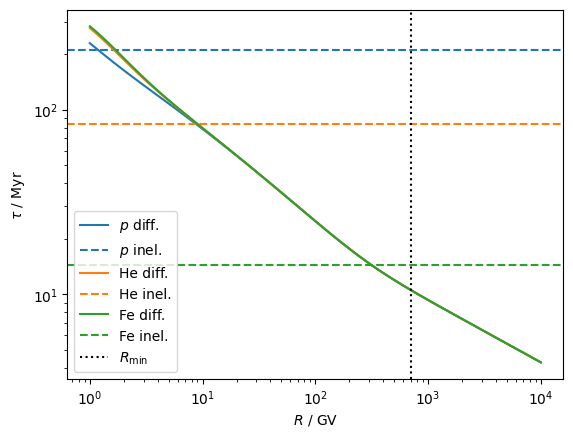

In [20]:
R_grid = np.geomspace(1e0, 1e4, 100) * u.GV

fig, ax = plt.subplots()

for A, Z, label in (
    (1, 1, "$p$"),
    (4, 2, "He"),
    (56, 26, "Fe"),
):
    # ax.plot(R_grid, D(R_grid, Z, A).to(u.cm**2 / u.s), label=label)
    # ax.axhline(2 * v_A * H)
    line, *_ = ax.plot(R_grid, (H**2 / (D(R_grid, Z, A))).to(u.Myr), label=f"{label} diff.")
    ax.axhline(tau_spallation(A=A), color=line.get_color(), linestyle="--", label=f"{label} inel.")

ax.axvline(7e2 * u.GV, color="k", linestyle=":", label="$R_\\mathrm{min}$")

ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$R$ / GV")
ax.set_ylabel("$\\tau$ / Myr")
plt.show()